<p style="font-size: 22pt; color: green; font-family: 'Times New Roman';">
 Import Modules necessary for running this notebook 
</p>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
from scipy.stats import linregress

import fun_CondProb as fn

<span style="font-family: 'Times New Roman'; font-size: 32px; color: red;"> List available FACTS Data:: <br> </span>
    

<span style="font-size: 22px; color: green;"> :: FACTS 1.1.1 </span> 
    

In [2]:
ssp='ssp585'
# path = f'/projects/kopp/ar2208/factsv1.1.1/coupling.{ssp}/output/'
# path = f'/Users/dota/werk/2022_09_FACTS/0000_facts-OPdata/amarel/ar2208/factsv1.1.1/coupling.{ssp}/output/'
path = f'/Users/dota/werk/2022_09_FACTS/0000_facts-OPdata/amarel/facts-experiments/221217/coupling.{ssp}/output/'


files=fn.list_files_with_names(path, ["global", "AIS"])
#
df = pd.DataFrame(files, columns=['File Name']).reset_index().rename(columns={'index': 'Index'})
print(df.to_string(index=False))

 Index                                                    File Name
     0     coupling.ssp585.ar5AIS.ipccar5.icesheets_AIS_globalsl.nc
     1    coupling.ssp585.ar5AIS.ipccar5.icesheets_EAIS_globalsl.nc
     2    coupling.ssp585.ar5AIS.ipccar5.icesheets_WAIS_globalsl.nc
     3  coupling.ssp585.bamber19.bamber19.icesheets_AIS_globalsl.nc
     4 coupling.ssp585.bamber19.bamber19.icesheets_EAIS_globalsl.nc
     5 coupling.ssp585.bamber19.bamber19.icesheets_WAIS_globalsl.nc
     6      coupling.ssp585.deconto21.deconto21.AIS_AIS_globalsl.nc
     7     coupling.ssp585.deconto21.deconto21.AIS_EAIS_globalsl.nc
     8     coupling.ssp585.deconto21.deconto21.AIS_WAIS_globalsl.nc
     9       coupling.ssp585.emuAIS.emulandice.AIS_EAIS_globalsl.nc
    10        coupling.ssp585.emuAIS.emulandice.AIS_PEN_globalsl.nc
    11       coupling.ssp585.emuAIS.emulandice.AIS_WAIS_globalsl.nc
    12            coupling.ssp585.emuAIS.emulandice.AIS_globalsl.nc
    13           coupling.ssp585.larmip.larmip.A

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<p style="font-size: 32px; color: green;">&#10145; Choose <span style="color: blue;">AIS</span> data file.</p>

In [3]:
start_year=2020; end_year=2100; unit='cm'; station=0
ssps = ['ssp126','ssp119', 'ssp245','ssp370', 'ssp585']

# Base path of data folder (all ssp).
base_path = '/Users/dota/werk/2022_09_FACTS/0000_facts-OPdata/amarel/ar2208/factsv1.1.1'

# Dictionary of filenames
file_names = {
    'lar': 'larmip.larmip.AIS_globalsl.nc',
    'b19': 'bamber19.bamber19.icesheets_AIS_globalsl.nc'
}

# Dictionary to store the results
AIS_all_ssp = {key: {} for key in file_names}

# Loop over each SSP scenario
for ssp in ssps:
    for key, filename in file_names.items():
        file_path = f'{base_path}/coupling.{ssp}/output/coupling.{ssp}.{filename}'
        dat, slc, time, lat, lon = fn.extract_nc_info(file_path, station, unit, start_year, end_year)
        AIS_all_ssp[key][ssp] = {'dat': dat, 'slc': slc, 'time': time, 'lat': lat, 'lon': lon, 'path': file_path}
del dat, slc, time, lat, lon, ssp, file_path, key, file_names

<div style="position: relative; width: 100%;">
    <hr style="position: absolute; left: 0; width: 50%; border: none; height: 2px; background-color: yellow; border-style: dotted;">
</div>

<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
     :: </span> 
<span style="color: red;"> PLOT </span>

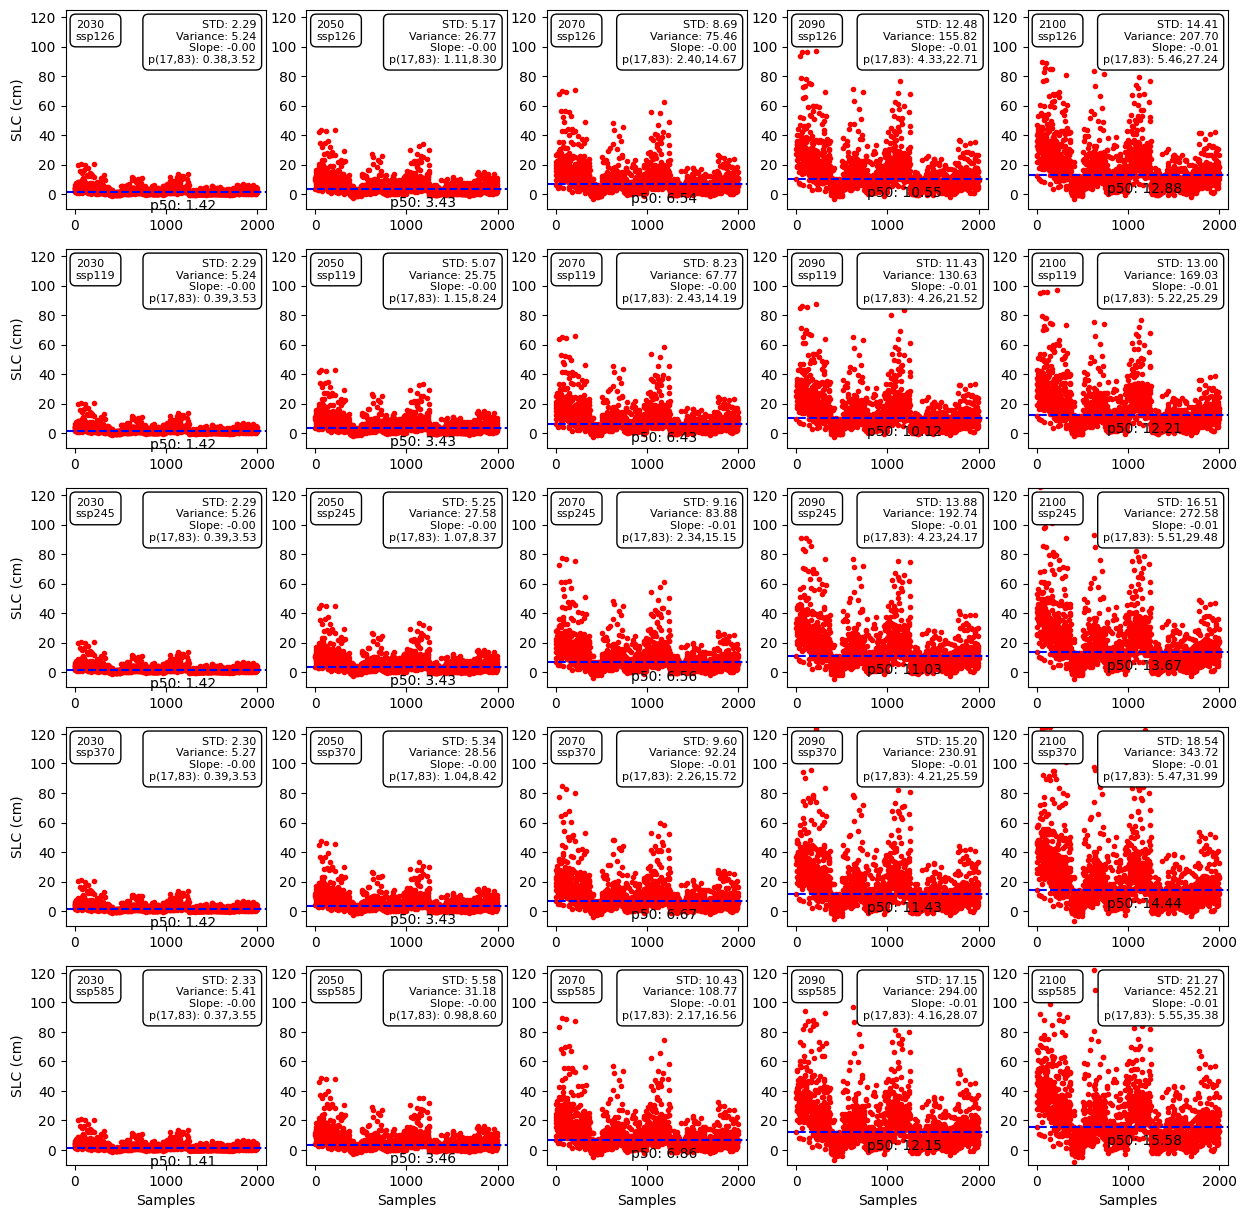

In [4]:

ssps=ssps; comp='lar'; data_=AIS_all_ssp; years_=[2030,2050,2070,2090, 2100]
fn.PLOT_samps(ssps,comp,data_,years_,color='r')

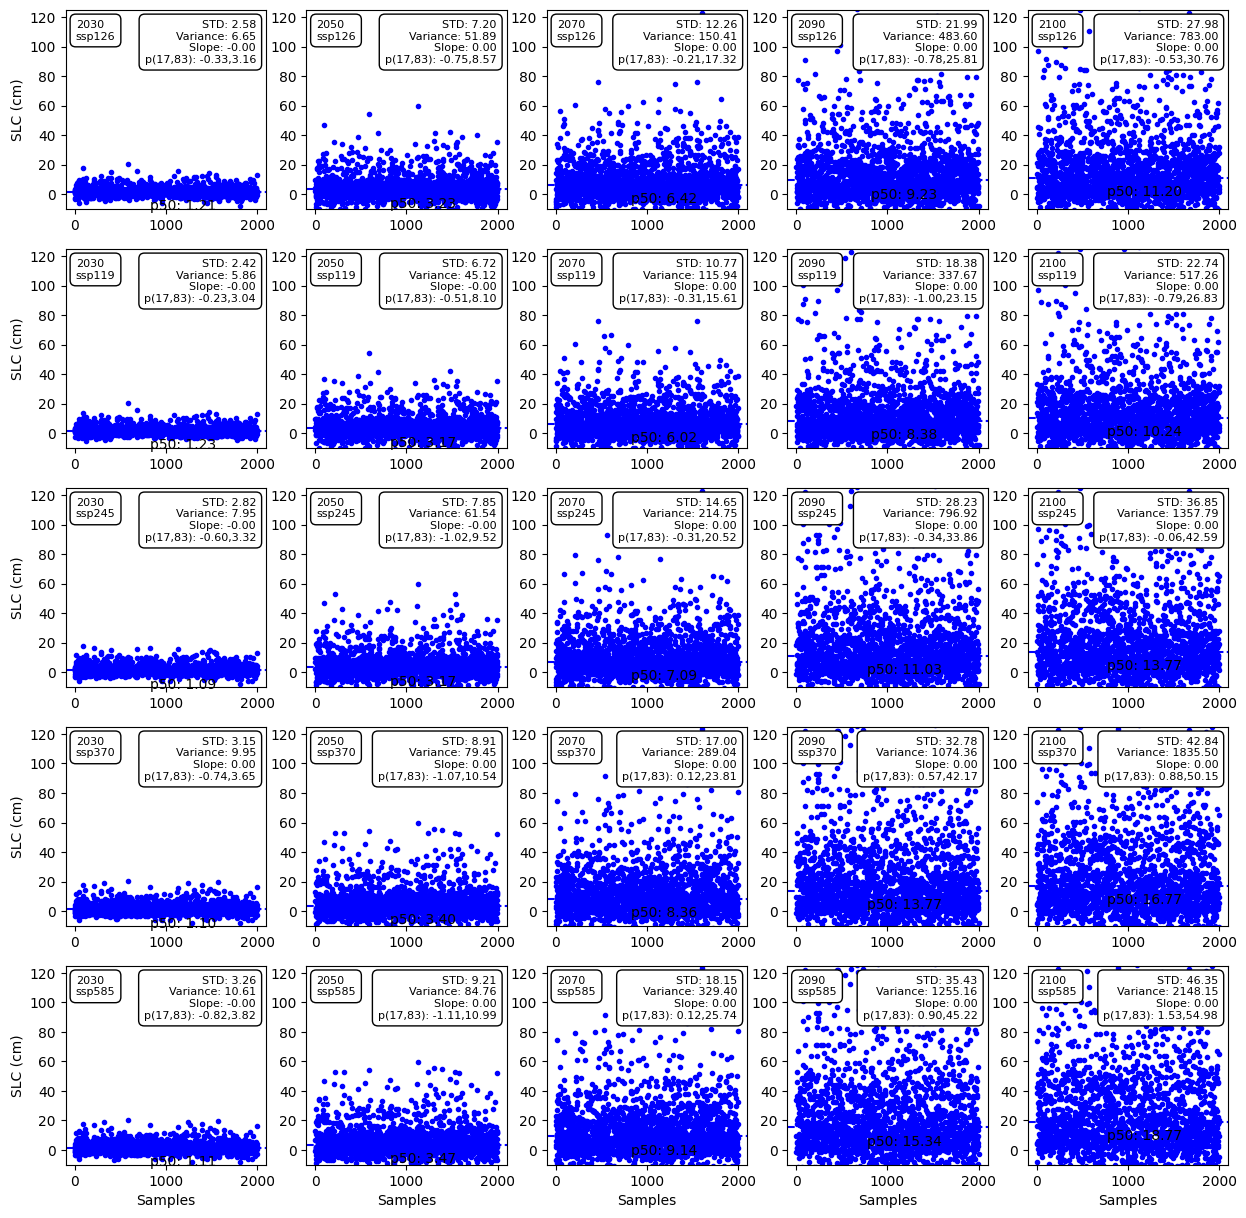

In [5]:

ssps=ssps; comp='b19'; data_=AIS_all_ssp; years_=[2030,2050,2070,2090, 2100]
fn.PLOT_samps(ssps,comp,data_,years_,color='b')

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
    Select Plot data.
</span>
<br>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    :: Extract all samples from a particulay year 
</span>

In [ ]:
def get_axis_data(dum_slc, dum_time, *specific_year):
    return [dum_slc[:, dum_time == t].squeeze() for t in specific_year]

In [ ]:
T1, T2, T3, T4, T5 = 2030, 2050, 2070, 2090, 2100
time_points = [T1, T2, T3, T4, T5]

# Initialize dictionaries to store stacked data for each time point
all_ssp_data = {t: [] for t in time_points}

# Loop over each SSP scenario
for ssp in ssps:
    # Extracting variables for the current SSP scenario
    var_ssp_slc = AIS_all_ssp['lar'][ssp]['slc']
    var_ssp_time = AIS_all_ssp['lar'][ssp]['time']

    # Call get_axis_data with these variables and the time points
    ssp_data = get_axis_data(var_ssp_slc, var_ssp_time, *time_points)

    # Append the data to the respective lists
    for t, data in zip(time_points, ssp_data):
        all_ssp_data[t].append(data)

# Stack the data
all_ssp_data_arrays = {t: np.hstack(data) for t, data in all_ssp_data.items()}


In [ ]:
plt.plot(all_ssp_data[2050][4])

In [ ]:
T1=2030; T2=2050; T3=2070; T4=2090; T5=2100
var='lar'

# Initialize lists to store stacked data for each time point
exec(f'{var}_ALLssp_{T1} = []')
exec(f'{var}_ALLssp_{T2} = []')
exec(f'{var}_ALLssp_{T3} = []')
exec(f'{var}_ALLssp_{T4} = []')
exec(f'{var}_ALLssp_{T5} = []')

# Loop over each SSP scenario
for ssp in ssps:
    # Extracting variables for the current SSP scenario
    exec(f"{var}_ssp_slc = AIS_all_ssp['lar']['{ssp}']['slc']")
    exec(f"{var}_ssp_time = AIS_all_ssp['lar']['{ssp}']['time']")

    # Call get_axis_data with these variables and the time points
    exec(f"{var}_ssp_{T1}, {var}_ssp_{T2}, {var}_ssp_{T3}, {var}_ssp_{T4}, {var}_ssp_{T5} = get_axis_data({var}_ssp_slc, {var}_ssp_time, {T1}, {T2}, {T3}, {T4}, {T5})")

    # Append the data to the respective lists
    exec(f'{var}_ALLssp_{T1}.append({var}_ssp_{T1})')
    exec(f'{var}_ALLssp_{T2}.append({var}_ssp_{T2})')
    exec(f'{var}_ALLssp_{T3}.append({var}_ssp_{T3})')
    exec(f'{var}_ALLssp_{T4}.append({var}_ssp_{T4})')
    exec(f'{var}_ALLssp_{T5}.append({var}_ssp_{T5})')

# stack
exec(f'{var}_ALLssp_{T1}_array = np.hstack({var}_ALLssp_{T1})')
exec(f'{var}_ALLssp_{T2}_array = np.hstack({var}_ALLssp_{T2})')
exec(f'{var}_ALLssp_{T3}_array = np.hstack({var}_ALLssp_{T3})')
exec(f'{var}_ALLssp_{T4}_array = np.hstack({var}_ALLssp_{T4})')
exec(f'{var}_ALLssp_{T5}_array = np.hstack({var}_ALLssp_{T5})')


In [ ]:
IDXtime

In [ ]:
IDXtime =np.where(AIS_all_ssp['lar']['ssp119']['time'] == 2040)[0][0]
plt.plot(AIS_all_ssp['lar']['ssp119']['slc'][:,IDXtime])

In [ ]:
plt.plot(lar_ALLssp_2030_array)

In [ ]:
T1=2030; T2=2050; T3=2070; T4=2090; T5=2100
var='b19'

# Initialize lists to store stacked data for each time point
exec(f'{var}_ALLssp_{T1} = []')
exec(f'{var}_ALLssp_{T2} = []')
exec(f'{var}_ALLssp_{T3} = []')
exec(f'{var}_ALLssp_{T4} = []')
exec(f'{var}_ALLssp_{T5} = []')

# Loop over each SSP scenario
for ssp in ssps:
    # Extracting variables for the current SSP scenario
    exec(f"{var}_ssp_slc = {var}_ssp_results['{ssp}']['slc']")
    exec(f"{var}_ssp_time = {var}_ssp_results['{ssp}']['time']")

    # Call get_axis_data with these variables and the time points
    exec(f"{var}_ssp_{T1}, {var}_ssp_{T2}, {var}_ssp_{T3}, {var}_ssp_{T4}, {var}_ssp_{T5} = get_axis_data({var}_ssp_slc, {var}_ssp_time, {T1}, {T2}, {T3}, {T4}, {T5})")

    # Append the data to the respective lists
    exec(f'{var}_ALLssp_{T1}.append({var}_ssp_{T1})')
    exec(f'{var}_ALLssp_{T2}.append({var}_ssp_{T2})')
    exec(f'{var}_ALLssp_{T3}.append({var}_ssp_{T3})')
    exec(f'{var}_ALLssp_{T4}.append({var}_ssp_{T4})')
    exec(f'{var}_ALLssp_{T5}.append({var}_ssp_{T5})')

# stack
exec(f'{var}_ALLssp_{T1}_array = np.hstack({var}_ALLssp_{T1})')
exec(f'{var}_ALLssp_{T2}_array = np.hstack({var}_ALLssp_{T2})')
exec(f'{var}_ALLssp_{T3}_array = np.hstack({var}_ALLssp_{T3})')
exec(f'{var}_ALLssp_{T4}_array = np.hstack({var}_ALLssp_{T4})')
exec(f'{var}_ALLssp_{T5}_array = np.hstack({var}_ALLssp_{T5})')


<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
    PLOT PDF's :: </span> 
<span style="color: red;"> LOG scale </span>

<span style="font-family: 'Times New Roman'; font-size: 16pt; color: black;"> Larmip AIS </span>

In [ ]:
axis_limits = {
    0: {'xlim': (0, 6, 1), 'ylim': (0, 60, 10)},
    1: {'xlim': (0, 15, 2), 'ylim': (0, 60, 10)},
    2: {'xlim': (0, 30, 5), 'ylim': (0, 60, 10)},
    3: {'xlim': (0, 50, 10), 'ylim': (0, 60, 10)}
}
fn.plot_1file('LARMIP',all_ssp_data_arrays[2030],lar_ALLssp_2050_array, lar_ALLssp_2070_array, lar_ALLssp_2090_array, lar_ALLssp_2100_array, 2030,2050,2070,2090,2100,
             None, None, None, None, 100, 1e-4,  'Reds','LOG', 5,
               'AIS',10, axis_limits, None,0.04,1)

In [ ]:
plt.plot(all_ssp_data_arrays[2090])

<span style="font-family: 'Times New Roman'; font-size: 16pt; color: black;"> Bamber 19 AIS </span>

In [ ]:
axis_limits = {
    0: {'xlim': (0, 6, 2), 'ylim': (0, 60, 10)},
    1: {'xlim': (0, 15, 2), 'ylim': (0, 60, 10)},
    2: {'xlim': (0, 30, 5), 'ylim': (0, 60, 10)},
    3: {'xlim': (0, 50, 10), 'ylim': (0, 60, 10)}
}
fn.plot_1file('Bamber 19',b19_ALLssp_2030_array,b19_ALLssp_2050_array, b19_ALLssp_2070_array, b19_ALLssp_2090_array, b19_ALLssp_2100_array, 2030,2050,2070,2090,2100,
             None, None, None, None, 100, 1e-4,  'Blues', 'LOG', 5,
               'AIS',10, axis_limits, None,0.002,1)

<hr style="border: none; height: 4px; background-color: yellow; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: black;"> Plot stacked Combined </span>

In [ ]:
axis_limits = {
    0: {'xlim': (0, 6, 1), 'ylim': (0, 60, 10)},
    1: {'xlim': (0, 15, 2), 'ylim': (0, 60, 10)},
    2: {'xlim': (0, 30, 5), 'ylim': (0, 60, 10)},
    3: {'xlim': (0, 50, 10), 'ylim': (0, 60, 10)}
}
fn.plot_1file('LARMIP',lar_ALLssp_2030_array,lar_ALLssp_2050_array, lar_ALLssp_2070_array, lar_ALLssp_2090_array, lar_ALLssp_2100_array, 2030,2050,2070,2090,2100,
             None, None, None, None, 100, 1e-4,  'Reds','LOG', 5,
               'AIS',10, axis_limits, None,0.04,1)

fn.plot_1file('Bamber 19',b19_ALLssp_2030_array,b19_ALLssp_2050_array, b19_ALLssp_2070_array, b19_ALLssp_2090_array, b19_ALLssp_2100_array, 2030,2050,2070,2090,2100,
             None, None, None, None, 100, 1e-4,  'Blues', 'LOG', 5,
               'AIS',10, axis_limits, None,0.002)


<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">